## MACS 30267 Final
Maha Adil, Angel Westbrook, Jason Gordon

[Intro to final]

In [1]:
## Setup
import pandas as pd
import numpy as np
import re

#%pip install nltk # This is a natural language processing package so I can stem words/remove stopwords/etc.
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk import FreqDist # FreqDist = count frequency of words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
sentiment = pd.read_csv("Data/nltk_split.csv")

In [3]:
sentiment.info()
# Not many non-null for coordinates. Should prolly kill that. Also not sure what the unnamed ones are.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163669 entries, 0 to 163668
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.2     163669 non-null  int64  
 1   Unnamed: 0.1     163669 non-null  int64  
 2   Unnamed: 0       163669 non-null  int64  
 3   id               163669 non-null  float64
 4   text             163669 non-null  object 
 5   favorite_count   163669 non-null  int64  
 6   retweet_count    163669 non-null  int64  
 7   created_at       163669 non-null  object 
 8   coordinates      43 non-null      object 
 9   score            163669 non-null  object 
 10  neg              163669 non-null  float64
 11  neu              163669 non-null  float64
 12  pos              163669 non-null  float64
 13  compound         163669 non-null  float64
 14  created_at_date  163669 non-null  object 
 15  Unnamed: 15      0 non-null       float64
 16  Unnamed: 16      0 non-null       floa

In [4]:
# Cutting the data to what I need!
data = sentiment[["id", "text", "favorite_count", "retweet_count", "created_at", "coordinates", "score", "neg", "neu", "pos", "compound", "created_at_date"]]
data

,id,text,favorite_count,retweet_count,created_at,coordinates,score,neg,neu,pos,compound,created_at_date
0,1.030000e+18,Gotta love the facts. https://t.co/bZ2G8AZuo9,0,0,2018-08-13 10:40:21+00:00,NaN,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.000,0.488,0.512,0.6369,8/13/2018
1,1.030000e+18,RT @ToolangiForest: A great day of action for ...,0,35,2018-08-13 10:40:10+00:00,NaN,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.000,0.651,0.349,0.8805,8/13/2018
2,1.030000e+18,@jonkudelka Harvey Norman reckons climate chan...,2,0,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,8/13/2018
3,1.030000e+18,RT @jayrosen_nyu: Why does skepticism about im...,0,52,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...",0.146,0.620,0.234,0.5267,8/13/2018
4,1.030000e+18,RT @FranceinIreland: On 5th November we call a...,0,16,2018-08-13 10:41:58+00:00,NaN,"{'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...",0.095,0.657,0.248,0.4939,8/13/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
163664,9.220000e+17,#RRN https://t.co/9DTuWYbyzn E.P.A. Cancels Ta...,0,0,2017-10-23 12:31:37+00:00,NaN,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",0.160,0.840,0.000,-0.2263,10/23/2017
163665,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,78,2017-10-23 12:50:34+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163666,9.220000e+17,RT @cathmckenna: We must all take action on #C...,0,21,2017-10-23 15:10:36+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163667,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,125,2017-10-23 15:17:57+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017


## RQ1: Splitting words by sentiment groups; analyzing content

In [5]:
def clean_text(s) -> list:
    tokens = re.findall(r'\b\w+\b', s.lower()) # For the most part I'm looking to just shift everything to lowercase based on what we have here.

    cleaned = [] # Cleaned list (to put into the new column)
    for tok in tokens:
        # Removing stopwords and "twitter words", i.e., RT, @[name], http (links), co (end to link). These can clog up the actual analysis.
        # While it's not perfect since it can miss some things, this cleans it enough so that it won't be a bother to our analysis.
        if tok in stopwords:
            continue # SKIP!
        if re.match(r"^rt|@|http|co", tok):
            continue # Also skip
        
        stemmed = stemmer.stem(tok)
        cleaned.append(stemmed)
    return cleaned

data['stemmed_tokens'] = data['text'].apply(clean_text)

C:\Users\jason\AppData\Local\Temp\ipykernel_13324\3089879494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemmed_tokens'] = data['text'].apply(clean_text)


In [23]:
def sent_label(row): # Sentiment tags on the dataset
    if row.pos >= max(row.neu, row.neg):
        return "pos"
    elif row.neu >= row.neg:
        return "neu"
    else:
        return "neg"

In [24]:
freqs = {} # Frequencies by topic
for label, sub in data.groupby("sentiment"):
    tokens = [tok for row in sub['stemmed_tokens'] for tok in row]
    freqs[label] = FreqDist(tokens)

In [26]:
print(f"Positive Terms: {freqs['pos'].most_common(50)}")
print(f"Neutral Terms: {freqs['neu'].most_common(50)}")
print(f"Negative Terms: {freqs['neg'].most_common(50)}")
freqs

Positive Terms: [('global', 102), ('warm', 92), ('ye', 88), ('love', 74), ('great', 67), ('good', 58), ('thank', 52), ('climat', 47), ('wow', 45), ('chang', 37), ('respect', 34), ('pleas', 32), ('energi', 32), ('lol', 31), ('like', 31), ('sure', 27), ('power', 26), ('share', 25), ('import', 25), ('use', 25), ('justic', 25), ('well', 21), ('climatechang', 21), ('x', 21), ('brianrezz', 20), ('figur', 20), ('platform', 20), ('advanc', 20), ('agenda', 20), ('miss', 20), ('peppa', 20), ('ha', 19), ('pretti', 19), ('help', 18), ('excel', 17), ('amaz', 17), ('true', 17), ('interest', 16), ('amp', 16), ('support', 15), ('read', 15), ('agre', 15), ('god', 15), ('opportun', 14), ('save', 14), ('work', 14), ('win', 13), ('inspir', 13), ('environ', 13), ('clean', 12)]
Neutral Terms: [('climat', 67952), ('chang', 60454), ('deal', 20402), ('climatechang', 17070), ('global', 14742), ('warm', 12380), ('year', 9047), ('amp', 8676), ('say', 8235), ('n', 7382), ('new', 6891), ('trump', 6785), ('wildfir',

{'neg': FreqDist({'lie': 3158, 'obama': 415, 'clinton': 414, 'mueller': 414, 'judg': 413, 'media': 357, 'stormi': 351, 'strozk': 351, '1': 351, 'the_unsilent_': 343, ...}),
 'neu': FreqDist({'climat': 67952, 'chang': 60454, 'deal': 20402, 'climatechang': 17070, 'global': 14742, 'warm': 12380, 'year': 9047, 'amp': 8676, 'say': 8235, 'n': 7382, ...}),
 'pos': FreqDist({'global': 102, 'warm': 92, 'ye': 88, 'love': 74, 'great': 67, 'good': 58, 'thank': 52, 'climat': 47, 'wow': 45, 'chang': 37, ...})}

## RQ2: Can we classify sentiment from ML techniques?

Idea: use the compound score (ranges from -1 to 1), and see if we can utilize the text column to predict in a classification pipeline.

In [10]:
# Library setup for NLP
import seaborn as sns # Mostly just for the distribution plot

from sklearn.pipeline import Pipeline # Need for a full workflow/cross-validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score, root_mean_squared_error # Need MSE for RMSE, R^2 clearly gets r-squared.

In [11]:
data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)) # Kinda annoying, but essentially making strongs from our cleaned lists.
X = data['processed_text'] #IV
y = data['compound'] # DV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, # Train set is 75%, test set is 25%.
                                                    random_state=123, shuffle=True) # Random seed for replication

pipe = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1),
                             min_df=3, # Drop extremely low-use words
                             max_features=2000)),
    ('reg', Ridge()) # USing a Ridge regression instead of linear to allow for hyperparameter tuning
    ])


param_grid = { # For CV
    'reg__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

C:\Users\jason\AppData\Local\Temp\ipykernel_13324\236551756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)) # Kinda annoying, but essentially making strongs from our cleaned lists.


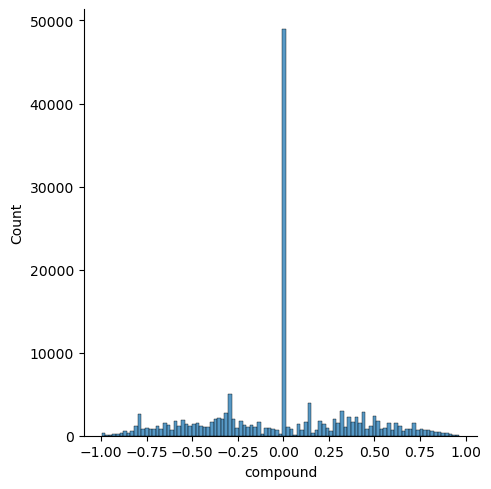

In [12]:
sns.displot(y) # Definitely skewed towards 0, but a bit of dissonance.

In [13]:
# K-Fold Cross-Validation (Hoping to make it fit as well as it can)
kf = KFold(n_splits=5, shuffle=True, random_state=123) # keeping the seed the same for replication
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1, refit=True) # Refits pipeline on entire training set

grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_['reg__alpha'])
print("Best CV R² on training folds:", grid.best_score_)

Best alpha: 1.0
Best CV R² on training folds: 0.7139050188115361


In [14]:
best_model = grid.best_estimator_ # Selects best grid based on the cross-validation
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Test  R²: {r2}")
print(f"Test RMSE: {rmse}")

Test  R²: 0.7172114415841832
Test RMSE: 0.21446462076161937


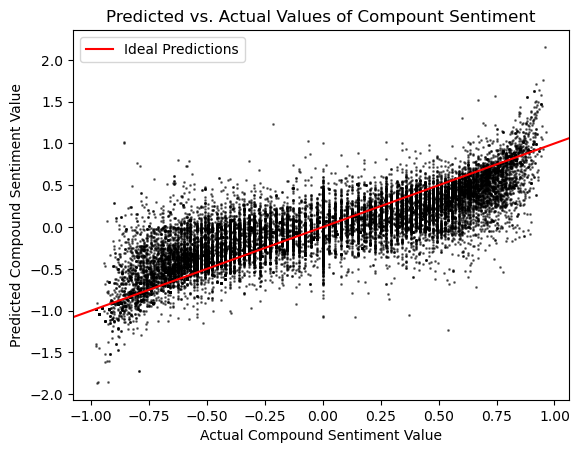

In [15]:
# Plotting
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, s=1, c='black', alpha=0.5)
plt.xlabel("Actual Compound Sentiment Value")
plt.ylabel("Predicted Compound Sentiment Value")
plt.title("Predicted vs. Actual Values of Compount Sentiment")
plt.axline((0, 0), slope=1, color='red', label='Ideal Predictions')
plt.legend()

## RQ3: What latent themes/topics exist in climate change discourse, and how do they align with sentiment?

In [ ]:
# Term Frequency-Inverse Document Frequency Vectorizer. Doing RELATIVE importance (so it's not dominated by "climate" or etc.)
from sklearn.feature_extraction.text import TfidfVectorizer

# LDA for finding specific topicality
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
docs = data['stemmed_tokens'].apply(lambda toks: " ".join(toks)) # Overall tweets (generally)

tfidf = TfidfVectorizer(min_df=5, max_df=0.9, max_features=2000)
dtm_X = tfidf.fit_transform(docs) # Technically not a document-term matrix BUT it's useful shorthand bc it's kinda a dtm.
terms = tfidf.get_feature_names_out()
# Essentially getting all the most important terms relative to each sentiment (ish)

In [43]:
n_topics = 10 # Random cap. I'm mostly doing 10 to see if we can get anything specific.
lda = LatentDirichletAllocation(n_components=n_topics, random_state=123) # Doing LDA. Group by topic.
doc_topic_dists = lda.fit_transform(dtm_X) # How much a tweet is about a specific topic.

In [44]:
def show_topics(model, feature_names, n_top=10): # Almost entirely just a viz thing.
    for i, comp in enumerate(model.components_):
        best = comp.argsort()[-n_top:][::-1]
        words = [feature_names[j] for j in best]
        print(f"Topic {i+1}: {', '.join(words)}")

show_topics(lda, terms)

Topic 1: glass, afford, lose, say, immedi, katearonoff, park, scene, bei, jurass
Topic 2: climatechang, climat, chang, amp, energi, fight, emiss, save, carbon, need
Topic 3: climat, chang, farmer, help, climatechang, new, amp, river, time, address
Topic 4: need, truth, one, anoth, speak, climat, kamalaharri, chang, de, order
Topic 5: scott, climat, chang, walker, temperatur, rise, warm, global, climatechang, year
Topic 6: deal, zink, wildfir, california, secretari, everyth, sensand, chang, climat, must
Topic 7: climat, chang, climatechang, read, new, world, power, america, last, report
Topic 8: problem, year, 2018, 2017, histori, hottest, 2016, bigger, 2015, proudresist
Topic 9: climat, chang, global, warm, believ, real, say, scientist, trump, like
Topic 10: climat, chang, climatechang, thank, latest, daili, health, threat, peopl, human


In [45]:
topic_cols = [f"topic_{i+1}" for i in range(n_topics)] # Adding topic cols to dataframe
data[topic_cols] = doc_topic_dists

# Grouped means by sentiment. i.e., the topics on average more prevalent in each category.
group_means = data.groupby('sentiment')[topic_cols].mean() 

group_means

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
sentiment,,,,,,,,,,
neg,0.054136,0.064490,0.056509,0.104482,0.057914,0.300722,0.057971,0.043910,0.133618,0.126248
neu,0.064182,0.145640,0.089679,0.077792,0.100830,0.075549,0.125021,0.076361,0.137057,0.107889
pos,0.055047,0.120879,0.064262,0.102517,0.056553,0.047125,0.165885,0.083267,0.219232,0.085233


In [46]:
data[topic_cols + ['compound']].corr()['compound'].sort_values(ascending=False)
# Sorting by comparison to compound (same as last command, higher is more positive, lower is more negative)

compound    1.000000
topic_2     0.126317
topic_7     0.091103
topic_4     0.049326
topic_3    -0.002187
topic_10   -0.008469
topic_5    -0.024358
topic_9    -0.024495
topic_1    -0.095797
topic_6    -0.099066
topic_8    -0.103325
Name: compound, dtype: float64

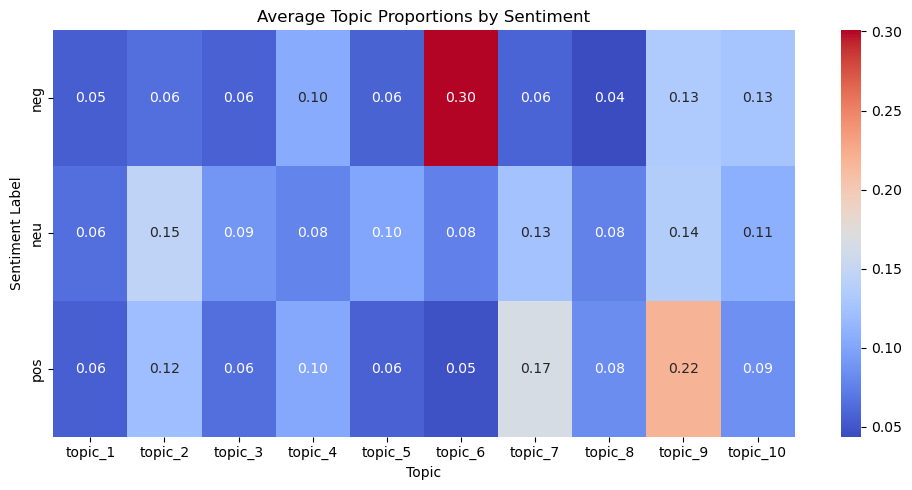

In [47]:
topic_cols = [col for col in data.columns if col.startswith("topic_")]

# Plotting for a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(group_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Topic Proportions by Sentiment")
plt.xlabel("Topic")
plt.ylabel("Sentiment Label")
plt.tight_layout()
plt.show()

In [48]:
## CORR: Most positive sentiment at the top, most negative sentiment at the bottom

corr = data[topic_cols + ['compound']].corr()
corr['compound'].drop('compound').sort_values(ascending=False)


topic_2     0.126317
topic_7     0.091103
topic_4     0.049326
topic_3    -0.002187
topic_10   -0.008469
topic_5    -0.024358
topic_9    -0.024495
topic_1    -0.095797
topic_6    -0.099066
topic_8    -0.103325
Name: compound, dtype: float64